In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.rc('font', size=14)
#import seaborn as sns
#sns.set(style='whitegrid', color_codes=True, rc={'figure.figsize':(11,8)}, font_scale=2)

from sklearn.cluster import KMeans

In [2]:
_DATA_DIR = '/classes/20800_winter2024/Data'

# K-means example


## Generate Data

In [3]:
def show_clusters(kmeans,X,iteration):
    y=kmeans.predict(X)
    plt.figure(figsize = (8,6))
    edgecolor=['blue','red','green',"magenta"]
    plt.title(f"WCV = {round(kmeans.inertia_,2)}")
    for i in range(kmeans.n_clusters):
        plt.plot(X[y==i,0],X[y==i,1],'o',markerfacecolor="none", markeredgecolor=edgecolor[i],markersize=6)
        plt.plot(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1],'o',markeredgecolor="black",markerfacecolor=edgecolor[i],markersize=10)
        plt.savefig('k_means_%s.pdf'%(iteration+1))

In [4]:
np.random.seed(0)
Xg1 =  0.15*np.random.randn(100,2)
Xg2 =  0.2 *np.random.randn(100,2) + [0,1];
Xg3 =  0.25*np.random.randn(100,2) + [1,1];
X   =  np.vstack((Xg1,Xg2,Xg3))
ii  =  np.array(range(X.shape[0]))
np.random.shuffle(ii)
X   =  X[ii]

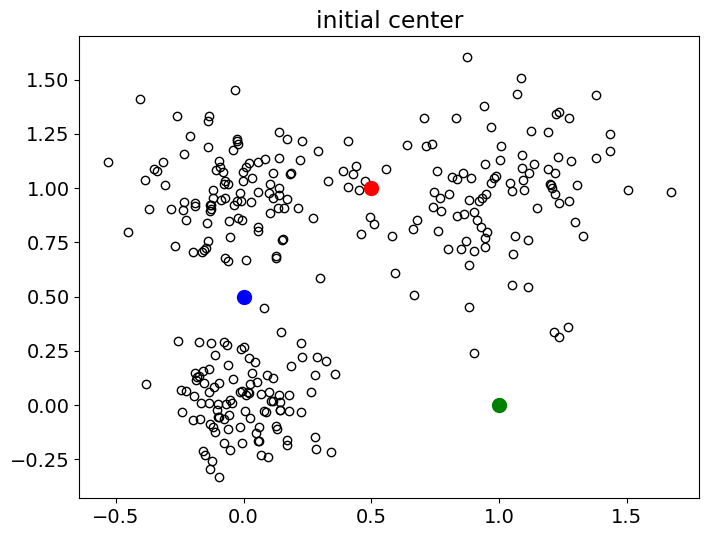

In [5]:
plt.figure(figsize = (8,6))
plt.plot(Xg1[:,0],Xg1[:,1],'o',markerfacecolor="none", markeredgecolor='black',markersize=6)
plt.plot(Xg2[:,0],Xg2[:,1],'o', markerfacecolor="none",markeredgecolor='black',markersize=6)
plt.plot(Xg3[:,0],Xg3[:,1],'o', markerfacecolor="none",markeredgecolor='black',markersize=6)
plt.plot(0,0.5,'o',color = 'blue',markersize=10)
plt.plot(0.5,1,'o',color="red",markersize=10)
plt.plot(1,0,'o',color="green",markersize=10)
plt.title("initial center")
plt.savefig('k_means_0.pdf')
plt.show()

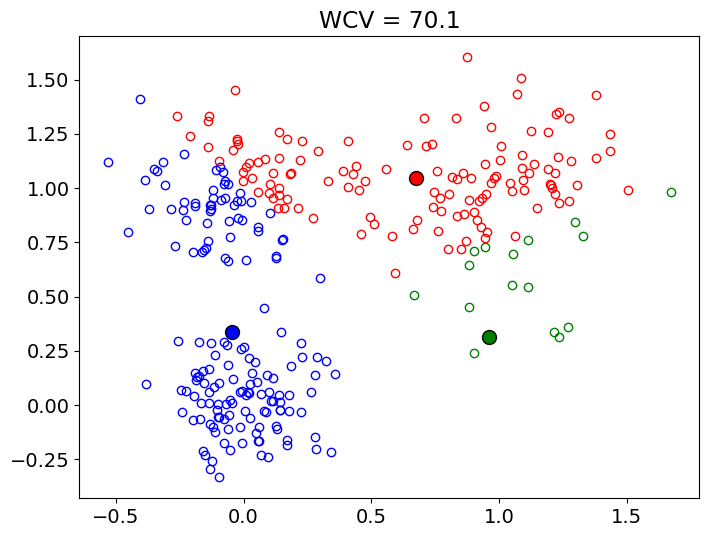

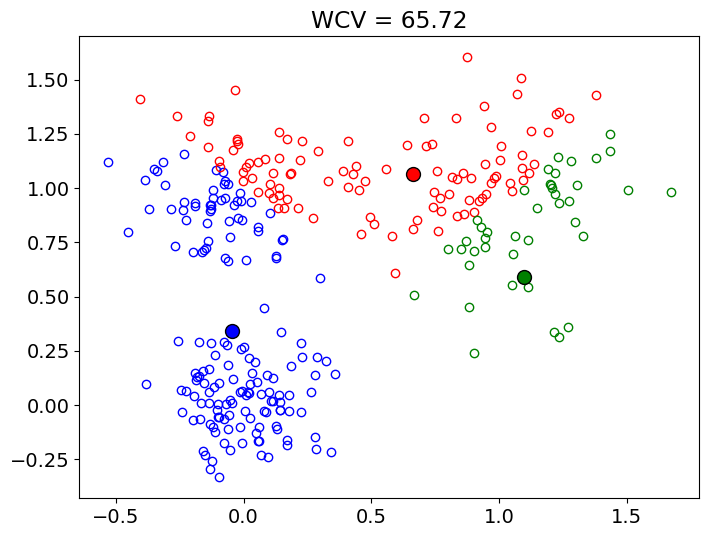

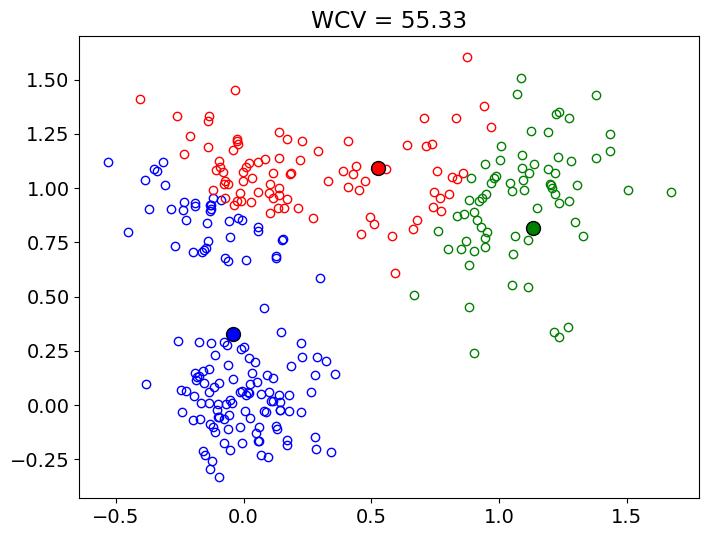

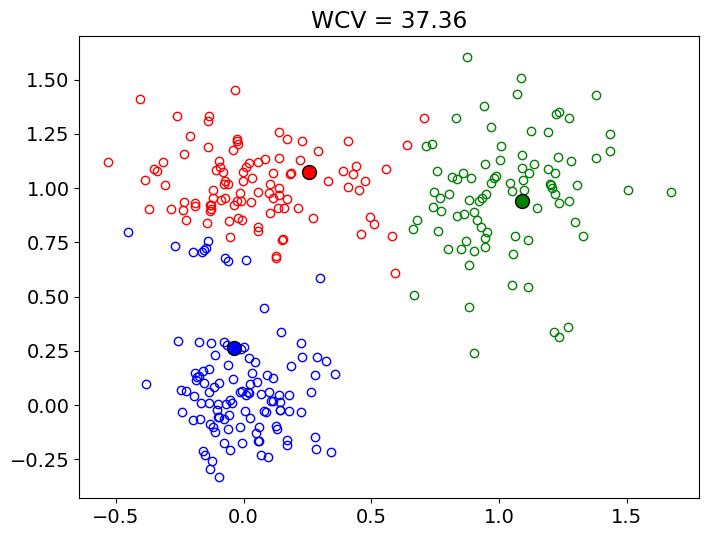

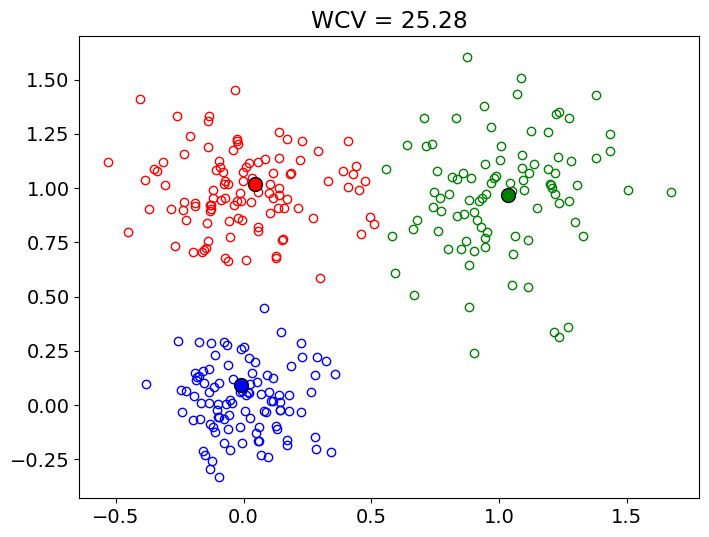

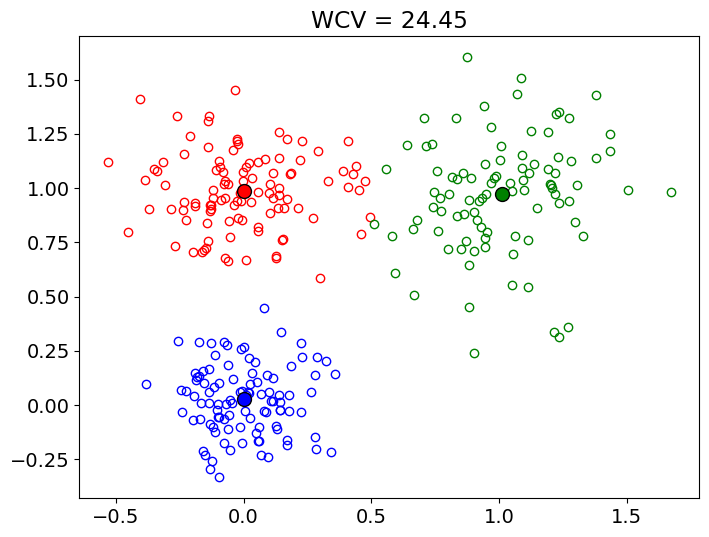

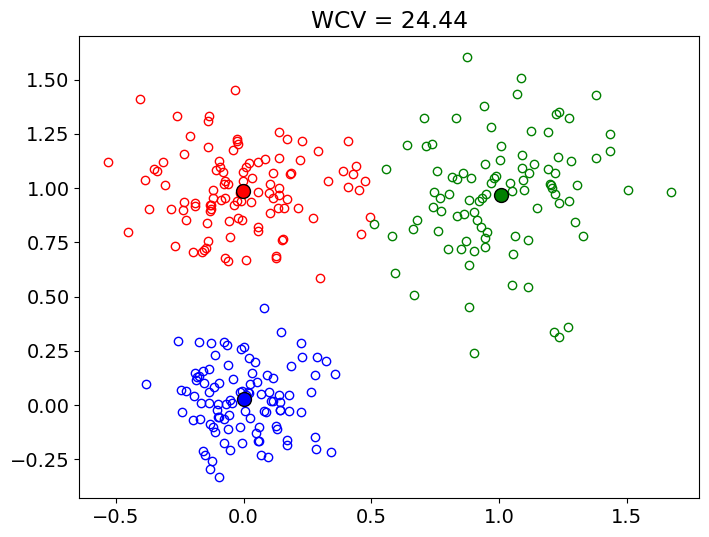

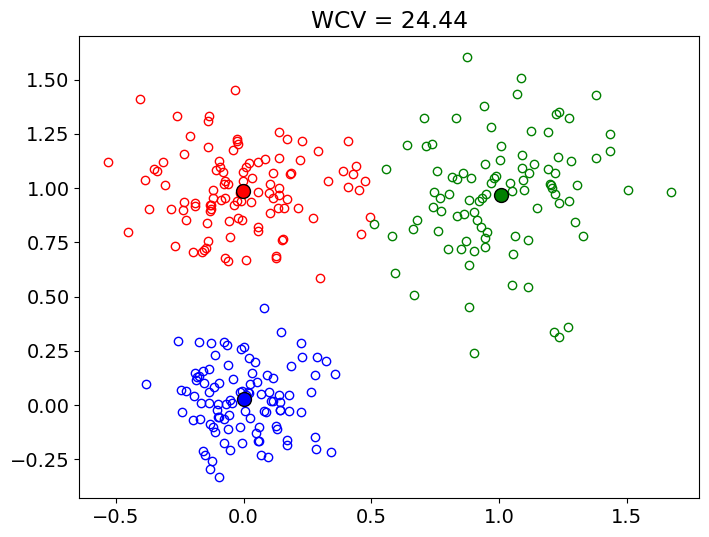

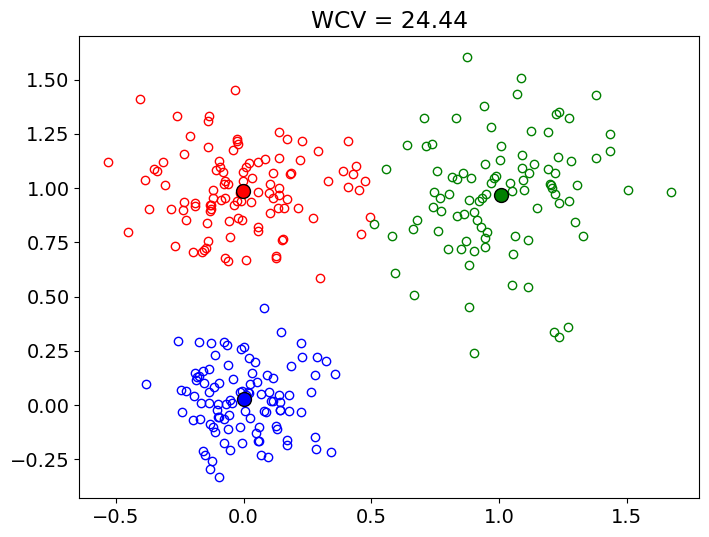

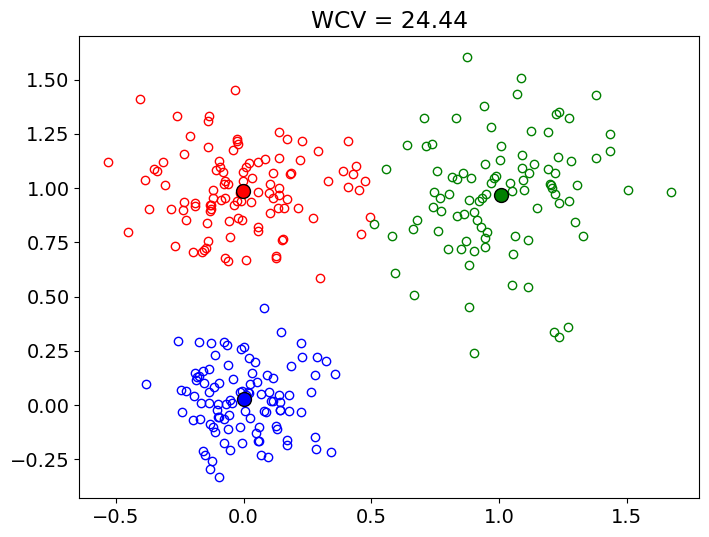

In [6]:
init_centers=np.array([[0,0.5],[0.5,1],[1,0]])
num_iters=10
for i in range(num_iters):
    kmeans = KMeans(n_clusters=3,init=init_centers,n_init=1,max_iter=1)
    kmeans.fit(X)
    show_clusters(kmeans,X,i)
    init_centers=kmeans.cluster_centers_

In [7]:
np.around(kmeans.cluster_centers_,2)

array([[ 0.  ,  0.03],
       [-0.  ,  0.99],
       [ 1.01,  0.97]])

In [8]:
Counter(kmeans.labels_)

Counter({1: 105, 0: 101, 2: 94})

In [9]:
round(kmeans.inertia_,2)

24.44

# K-means example,  multiple runs

## Generate data

In [ ]:
np.random.seed(0)
Xg1 =  0.15*np.random.randn(60,2)
Xg2 =  0.2*np.random.randn(60,2) + [0.25,0.5];
Xg3 =  0.2*np.random.randn(60,2) + [1,0];
Xg4  = 0.2*np.random.randn(70,2) + [1,1];
X=np.vstack((Xg1,Xg2,Xg3,Xg4))
ii=np.array(range(X.shape[0]))
np.random.shuffle(ii)
X=X[ii]

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(X[:,0],X[:,1],'o',markerfacecolor="none", markeredgecolor='black',markersize=6)
plt.show()

## n = 250, K = 4, Try different initial centers


In [ ]:
np.random.seed(100)
for i in range(5):        
    kmeans=KMeans(n_clusters=4,init='random',n_init=1,max_iter=10)
    kmeans.fit(X)
    show_clusters(kmeans,X,i)
    init_centers=kmeans.cluster_centers_

# MNIST Data

### load data

In [ ]:
raw_data = np.load('%s/MNIST_data.npy'%(_DATA_DIR))
label    = np.load('%s/MNIST_labels.npy'%(_DATA_DIR))
data = raw_data/255

In [ ]:
data.shape

In [ ]:
nrows = 3;
ncols = 5;
plt.figure(figsize = (12, 6))
for i in range(nrows*ncols):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(data[i].reshape((28,28)), cmap = 'gray')
    plt.axis('off')
plt.savefig('MNIST_ex.pdf')    
plt.show()

### Split training and testing data set

In [ ]:
train_X = data[:60000]
test_X = data[60000:]
train_label = label[:60000]
test_label = label[60000:]

### Training KMeans with K = 10

In [ ]:
K = 10
model = KMeans(n_clusters = K)
digit_model = model.fit(train_X)
predict_cluster = digit_model.predict(train_X)


### Model Diagnosis

In [ ]:
def diagnosis_MNIST(K, predict_cluster):
### plot center of cluster
    plt.figure(figsize = (10,(K//5)*2))
    plt.rc('font', size=10)
    cluster_digit_label = []
    print('The center of each cluster')
    for i in range(K):
        plt.subplot(K//5,5,i+1)
        plt.imshow(digit_model.cluster_centers_[i].reshape((28,28)), cmap = 'gray')
        plt.axis('off')
        cluster_points_label = train_label[predict_cluster == i]
        label = np.argmax(np.bincount(cluster_points_label))
        cluster_digit_label.append(label)
        plt.title(f'Digit Label = {label}')
    plt.show()
    
    ### Use marjority label of the cluster as the cluster label and calculate accuracy on train data
    correct_point_number = 0
    for i in range(K):
        plt.figure(figsize = (10,4))
        predict_label = cluster_digit_label[i]
        print(f'The majority label of each cluster: {predict_label}')
        cluster_points_label = train_label[predict_cluster == i]
        cluster_points = train_X[predict_cluster == i]
        correct_point_number += sum(cluster_points_label == predict_label)
        n = len(cluster_points)
        
        ### show 10 figure of each cluster
        for j in range(10):
            idx = np.random.randint(n)
            point = cluster_points[idx]
            true_label = cluster_points_label[idx]
            plt.subplot(2,5,j+1)
            plt.imshow(point.reshape((28,28)), cmap = 'gray')
            plt.axis('off')
            label = np.argmax(np.bincount(cluster_points_label))
            plt.title(f'True Label = {true_label}')
        plt.show()
        
    accuracy = correct_point_number/train_X.shape[0]
    
    print("If using the majority label in the clusters as the predicted label, ",
          "the model has the accuracy of :", np.round(accuracy * 100, 4), 
          "% on training data set.")
    
    ### accuracy on test data
    correct_point_number = 0
    predicted_test_label = digit_model.predict(test_X)
    for i in range(K):
        predict_label = cluster_digit_label[i]
        cluster_points_label = test_label[predicted_test_label == i]
        cluster_points = test_X[predicted_test_label == i]
        correct_point_number += sum(cluster_points_label == predict_label)
    accuracy = correct_point_number/test_X.shape[0]
    
    print("If using the majority label in the clusters as the predicted label, ",
          "the model has the accuracy of :", np.round(accuracy * 100, 4), 
          "% on testing data set.")

In [ ]:
diagnosis_MNIST(10, predict_cluster)

### Select K by AIC and BIC 

In [ ]:
def get_bic(k):
    grp = KMeans(n_clusters= k)
    grp.fit(train_X)
    bic = grp.inertia_ + k*train_X.shape[1]*np.log(train_X.shape[0])
    return bic

In [ ]:
BIC = []
for k in  tqdm(range(10, 60, 10)):
    bic = get_bic(k)
    BIC.append(bic)
    
plt.figure(figsize = (12,6))
plt.rc('font', size=14)
plt.plot(np.arange(10,60,10),BIC)
ks = np.arange(10,60,10)
k_min = ks[np.argmin(BIC)]
plt.axvline(k_min,linestyle='--', color='b',
            label='K chosen by BIC')
plt.xlabel("K")
plt.ylabel("BIC")
plt.title("Use BIC to choose K")
plt.legend()
plt.show()

In [ ]:
def get_aic(k):
    grp = KMeans(n_clusters= k)
    grp.fit(train_X)
    aic = grp.inertia_ + 2*k*train_X.shape[1]
    return aic 

In [ ]:
AIC = []
for k in  tqdm(range(10, 200, 30)):
    aic = get_aic(k)
    AIC.append(aic)
    
plt.figure(figsize = (12,6))
plt.rc('font', size=14)
plt.plot(np.arange(10,200,30),AIC)
ks = np.arange(10,200,30)
k_min = ks[np.argmin(AIC)]
plt.axvline(k_min,linestyle='--', color='b',
            label='K chosen by AIC')
plt.xlabel("K")
plt.ylabel("AIC")
plt.title("Use AIC to choose K")
plt.legend()
plt.show()

In [ ]:
k_min

### Train a model with larger K

In [ ]:
K = 30
model = KMeans(n_clusters = K)
digit_model = model.fit(train_X)
predict_cluster = digit_model.predict(train_X)

In [ ]:
diagnosis_MNIST(30, predict_cluster)

# When K-means fail

## Revisit the simulated data in lecture 4

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

In [ ]:
def visualize(y_true, y_predict, method):
    colors = ['red','green','blue']
    plt.figure(figsize = (16,8))
    plt.subplot(1,2,1)
    plt.scatter(X[:,0], X[:,1],linewidth=0, c = [colors[i] for i in y])
    plt.title('True cluster')
    plt.subplot(1,2,2)
    plt.scatter(X[:, 0], X[:, 1], linewidth=0,c=[colors[i] for i in y_predict])
    plt.title('%s cluster'%(method))
    if (method == 'k-means'):
        for cluster_x, cluster_y in Kmean.cluster_centers_:
            plt.scatter(cluster_x, cluster_y, s=500, c='black', marker='x', linewidth = 5)

In [ ]:
# DGP
np.random.seed(0)

n_samples = 1500

# Generate data
label = [0] * n_samples
for i in np.random.randint(0,n_samples,int(n_samples/2)):
    label[i] = 1
    
noisy_circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)
balanced = make_blobs(n_samples=n_samples, random_state=8,centers=2,center_box = (-4,4))
imbalanced = make_blobs(n_samples = [n_samples, 100],random_state = 8, cluster_std = [1.5,0.1],center_box = (-3,3))
no_structure = np.random.rand(n_samples, 2), label

In [ ]:
X,y = noisy_circles
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)
clusters = Kmean.predict(X)
visualize(y, clusters, 'k-means')

In [ ]:
Spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
spectral_clusters = Spectral.fit_predict(X)
visualize(y, spectral_clusters, 'spectral')

In [ ]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X)
gmm_clusters = gmm.predict(X)
visualize(y, gmm_clusters, 'GaussianMixture')

In [ ]:
X,y= noisy_moons
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)
clusters = Kmean.predict(X)
visualize(y, clusters, 'k-means')

In [ ]:
Spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
spectral_clusters = Spectral.fit_predict(X)
visualize(y, spectral_clusters, 'spectral')

In [ ]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X)
gmm_clusters = gmm.predict(X)
visualize(y, gmm_clusters, 'GaussianMixture')

In [ ]:
# Different variance
n_samples = 1500
random_state=170
X, y = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
Kmean = KMeans(n_clusters=3, random_state=random_state)

In [ ]:
Kmean = KMeans(n_clusters=3, random_state=random_state)
clusters = Kmean.fit_predict(X)
visualize(y, clusters, 'k-means')

In [ ]:
Spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans')
spectral_clusters = Spectral.fit_predict(X)
colors = ['red','green','blue']
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1],linewidth=0, c = [colors[i] for i in y])
plt.title('True cluster')
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], linewidth=0,c=[colors[i] for i in y_predict])
plt.title('%s cluster'%(method))
if (method == 'k-means'):
    for cluster_x, cluster_y in Kmean.cluster_centers_:
        plt.scatter(cluster_x, cluster_y, s=500, c='black', marker='x', linewidth = 5)
visualize(y, spectral_clusters, 'spectral')

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
gmm_clusters = gmm.predict(X)
visualize(y, gmm_clusters, 'GaussianMixture')

In [ ]:
# Anisotropicly distributed data
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X = np.dot(X, transformation)

In [ ]:
Kmean = KMeans(n_clusters=3, random_state=random_state)
clusters = Kmean.fit_predict(X)
visualize(y, clusters, 'k-means')

In [ ]:
Spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans')
spectral_clusters = Spectral.fit_predict(X)
visualize(y, spectral_clusters, 'spectral')

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
gmm_clusters = gmm.predict(X)
visualize(y, gmm_clusters, 'GaussianMixture')

# Political Voting clustering

In [ ]:
votes = np.loadtxt('%s/voting_record2005.txt'%(_DATA_DIR),dtype=str,delimiter='\t')
votes = pd.DataFrame(votes)

for i in range(votes.shape[1]-1):
    votes.iloc[:,i] = votes.iloc[:,i].astype('float')
    
votes = votes.iloc[:,:-1]

n = votes.shape[0]
m = votes.shape[1]

In [ ]:
from scipy.spatial.distance import pdist

dist1 = pd.DataFrame(index = range(n), columns = range(n))
for i in range(n):
    for j in range(n):
        dist1.iloc[i,j] = float(pdist(votes.iloc[[i,j],:].values.astype(float),'cityblock'))

In [ ]:
W = pd.DataFrame(index = range(n), columns = range(n))
for i in range(n):
    W.iloc[:,i] = dist1.iloc[:,i].apply(lambda x: np.exp(-x/m))

In [ ]:
G = np.diag(W.sum()).astype(float)
L = np.eye(n) - np.linalg.inv(G) @ W
L = L.astype(float)

In [ ]:
eig_val,eig_vec =  np.linalg.eig(L)
eig_vec = pd.DataFrame(eig_vec)

In [ ]:
eig_vec

In [ ]:
parties = np.loadtxt('%s/house_party2005.txt'%(_DATA_DIR),dtype=str,delimiter='\t')
parties = pd.DataFrame(parties).iloc[:-1,:]
parties.columns = ['Party']
parties = parties.astype('float')

In [ ]:
members = np.loadtxt('%s/house_members2005.txt'%(_DATA_DIR),dtype=str,delimiter='\t')
members = pd.DataFrame(members)
members.columns = ['ID','Name','Group','State']

In [ ]:
result = pd.DataFrame({'Name':members.Name,'second_eig': -eig_vec.iloc[:,1],'Group':members.Group})
result.sort_values('second_eig')

In [ ]:
from sklearn.manifold import TSNE 

tsne = TSNE()
tsne.fit_transform(votes)
tsne = pd.DataFrame(tsne.embedding_, index = votes.index) 

G1 =parties[parties.Party ==1].index.tolist()
G2 =parties[parties.Party ==0].index.tolist()

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(tsne.iloc[G1,0],tsne.iloc[G1,1],'o',c = 'red')
plt.plot(tsne.iloc[G2,0],tsne.iloc[G2,1],'o',c = 'blue')
plt.savefig('tsne.pdf')
plt.show()

# Hierarchical clustering

In [ ]:
df = pd.read_csv("%s/Word_Weights_By_Topic_Phi.csv"%(_DATA_DIR),index_col = 0)

In [ ]:
df.index.name = "topic"
df = df.T

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (16,40))
plt.title("Hierarchical Taxonomy of WSJ News")  
dend = shc.dendrogram(shc.linkage(df, method='ward'),labels=df.index,orientation='left',leaf_font_size = 12)